# Project 6 : Wrangle and Analyze Data
<b> By: Bayader Alsahafi

Using Python and its libraries, we'll gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. All of the wrangling efforts will be documented in a Jupyter Notebook, plus showcased through analyses and visualizations using Python (and its libraries).
 
The dataset we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import requests
import io

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


In [2]:
#to show full text in display
pd.set_option('display.max_colwidth', -1)

## Collecting

**Resource 1: The WeRateDogs Twitter archive**

In [3]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


<br>**Resource 2: The tweet image predictions**

In [4]:
folder = 'image_predections'

if not os.path.exists(folder):
    os.makedirs(folder)
    

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
#check if request was successfull
response 

<Response [200]>

In [6]:
#Decode response and strore it in a dataframe
df_2 = pd.read_csv(io.StringIO(response.content.decode('utf-8')), sep = '\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<br>**Resource 3: tweet_json.txt**

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [8]:
#read file line by line and store it as a dataframe
tweets = []

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        tweets.append({'tweet_id' : status['id'],
                      'retweet_count' : status['retweet_count'],
                      'favorite_count' : status['favorite_count']})

df_3 = pd.DataFrame(tweets, columns = ['tweet_id', 'retweet_count','favorite_count'])
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assesing

In [9]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_1.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [13]:
df_1[df_1.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [14]:
df_1[df_1.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [15]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [19]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality
<b>
    
##### Twitter archive table: df_1
<b>
    
- tweet_id, timestamp don't have the correct type
- in_reply_to_status_id, in_reply_to_user_i, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have alot of nulls, more than 90% of data is missing
- some ratings aren't correct for having a denomenator of > 10
- some ratings aren't accurate for having a numerator > 20
- Since we have retweets count in Image Predections: df_2 table, we should remove retweets from this table
    
##### Image Predections: df_2
<b>
    
- tweet_id column should be string
- Columns names aren't descriptive
- Dogs breeds should be categorical datatype
- Some dogs breeds start with capital letters, some not, should be adjusted for consistency
    
##### Tweet JSON: df_3
<b>
    
- tweet_id column should be string



### Tidiness
<b>
    
##### Twitter archive table: df_1
<b>
    
- doggo, floofer, pupper and puppo columns should be combined into one column that represents the dogs stage.

##### Image Predections: df_2
<b>
    
- Prdections should be combined with Twitter Archive Table

##### Tweet JSON: df_3
<b>
    
- Tweets should be in Twitter Archive Table: df_1
    

## Cleaning

In [21]:
#make a copy of all dataframes
clean_df1 = df_1.copy()
clean_df2 = df_2.copy()
clean_df3 = df_3.copy()

**We'll start with cleaning missing data**

- **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have alot of nulls, more than 90% of data is missing**

#### Define
Best way is to drop those columns but first we'll extract important information from them which will help us solve the quality issue of removing retweets

- Since we have retweets count in Image Predections: df_2 table, we should remove retweets from this table

so first we'll remove retweets and replays and then we'll drop columns

Code

In [22]:
#only keep original tweets
clean_df1 = clean_df1[clean_df1.in_reply_to_user_id.isnull()]
clean_df1 = clean_df1[clean_df1.retweeted_status_user_id.isnull()]

#drop columns
clean_df1 = clean_df1.drop(['in_reply_to_status_id','in_reply_to_user_id',
                'retweeted_status_id','retweeted_status_user_id',
                'retweeted_status_timestamp'], axis = 1)

#adjust index
clean_df1 = clean_df1.reset_index()

Test

In [23]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
index                 2097 non-null int64
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(4), object(9)
memory usage: 213.1+ KB


**Now we'll move on to cleaning tidiness issues**

- **doggo, floofer, pupper and puppo columns should be combined into one column that represents the dogs stage.**

#### Define
Create a stage column
<br>join values in the four columns into the stage column
<br>drop the four columns of 'doggo','floofer','pupper','puppo'

#### Code

In [24]:
#replace None strings with np.nan to easily drop them afterwards
clean_df1 = clean_df1.replace('None', np.nan, regex=True)

clean_df1['stage'] = clean_df1[['doggo','floofer','pupper','puppo']].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

clean_df1 = clean_df1.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [25]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
index                 2097 non-null int64
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2095 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
stage                 2097 non-null object
dtypes: int64(4), object(6)
memory usage: 163.9+ KB


In [26]:
clean_df1.stage.value_counts()

                 1761
pupper           221 
doggo            72  
puppo            23  
floofer          9   
doggo pupper     9   
doggo floofer    1   
doggo puppo      1   
Name: stage, dtype: int64

- **Perdections should be combined with Twitter Archive Table**

#### Define
Merge predections table: clean_df2 with Twitter Archive Table: clean_df1

#### Code

In [27]:
#merge dfs based on tweets id
clean_df1 = clean_df1.merge(clean_df2, on =['tweet_id'], how ='left')

#### Test

In [28]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
index                 2097 non-null int64
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2095 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
stage                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-nu

- **Tweets should be in Twitter Archive Table: df_1**

#### Define
Merge Tweets from JSON - clean_df3 with Twitter Archive - clean_df1

#### Code

In [29]:
#merge dfs based on tweets id
clean_df1 = clean_df1.merge(clean_df3, on = ['tweet_id'], how = 'left')

#### Test

In [30]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
index                 2097 non-null int64
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2095 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
stage                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-nu

<br>**Now lets deal with quality issues**

- **Twitter archive table - df_1: tweet_id, timestamp don't have the correct type**

#### Define
Change datatypes:
<br>tweet_id from integer to string
<br>timestamp from string to date

#### Code

In [31]:
clean_df1['tweet_id'] = clean_df1['tweet_id'].astype('str')
clean_df1['timestamp'] = pd.to_datetime(clean_df1['timestamp'])

#### Test

In [32]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
index                 2097 non-null int64
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2095 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
stage                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                19

- **some ratings aren't accurate for having a denomenator of > 10**
- **some ratings aren't accurate for having a numerator > 20**

#### Define
Replace wrong ratings with correct ratings manually using .loc(tweet_id)

#### Code

In [33]:
clean_df1['rating_numerator'] = clean_df1['rating_numerator'].astype(float)

clean_df1.loc[(clean_df1['tweet_id'] == '740373189193256964'), 'rating_numerator'] = 14
clean_df1.loc[(clean_df1['tweet_id'] == '740373189193256964'), 'rating_denominator'] = 10

clean_df1.loc[(clean_df1['tweet_id'] == '722974582966214656'), 'rating_numerator'] = 13
clean_df1.loc[(clean_df1['tweet_id'] == '722974582966214656'), 'rating_denominator'] = 10


clean_df1.loc[(clean_df1['tweet_id'] == '716439118184652801'), 'rating_numerator'] = 11
clean_df1.loc[(clean_df1['tweet_id'] == '716439118184652801'), 'rating_denominator'] = 10


clean_df1.loc[(clean_df1['tweet_id'] == '682962037429899265'), 'rating_numerator'] = 10
clean_df1.loc[(clean_df1['tweet_id'] == '682962037429899265'), 'rating_denominator'] = 10


clean_df1.loc[(clean_df1['tweet_id'] == '810984652412424192'), 'rating_numerator'] = None
clean_df1.loc[(clean_df1['tweet_id'] == '810984652412424192'), 'rating_denominator'] = None


clean_df1.loc[(clean_df1['tweet_id'] == '786709082849828864'), 'rating_numerator'] = 9.75
clean_df1.loc[(clean_df1['tweet_id'] == '786709082849828864'), 'rating_denominator'] = 10


clean_df1.loc[(clean_df1['tweet_id'] == '778027034220126208'), 'rating_numerator'] = 11.27
clean_df1.loc[(clean_df1['tweet_id'] == '778027034220126208'), 'rating_denominator'] = 10


clean_df1.loc[(clean_df1['tweet_id'] == '680494726643068929'), 'rating_numerator'] = 11.26
clean_df1.loc[(clean_df1['tweet_id'] == '680494726643068929'), 'rating_denominator'] = 10


#### Test

In [34]:
clean_df1.loc[clean_df1.tweet_id.isin(['740373189193256964', '722974582966214656', '716439118184652801',
                                       '682962037429899265', '810984652412424192','786709082849828864'
                                       ,'778027034220126208','680494726643068929'])
              ,['tweet_id', 'text', 'rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
403,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
528,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
586,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
853,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.00,10.0
948,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.00,10.0
985,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.00,10.0
1426,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.00,10.0
1474,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


- **Columns names aren't descriptive**

#### Define
change columns names with df.rename

#### Code

In [35]:
clean_df1 = clean_df1.rename(columns = {'p1':'first_predection', 'p1_conf':'first_predection_conf', 
                            'p1_dog':'first_predection_isdog', 'p2':'second_predection', 'p2_conf':'second_predection_conf', 
                            'p2_dog':'second_predection_isdog', 'p3':'third_predection', 'p3_conf':'third_predection_conf', 
                            'p3_dog':'third_predection_isdog'})

#### Test

In [36]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
index                      2097 non-null int64
tweet_id                   2097 non-null object
timestamp                  2097 non-null datetime64[ns]
source                     2097 non-null object
text                       2095 non-null object
expanded_urls              2094 non-null object
rating_numerator           2096 non-null float64
rating_denominator         2096 non-null float64
name                       1494 non-null object
stage                      2097 non-null object
jpg_url                    1971 non-null object
img_num                    1971 non-null float64
first_predection           1971 non-null object
first_predection_conf      1971 non-null float64
first_predection_isdog     1971 non-null object
second_predection          1971 non-null object
second_predection_conf     1971 non-null float64
second_predection_isdog    1971 non-null object
third_predection 

- **Dogs breeds should be categorical datatype**

#### Define
Change dog first, second, third predections from string to categorical

#### Code

In [37]:
clean_df1['first_predection'] = clean_df1['first_predection'].astype('category')
clean_df1['second_predection'] = clean_df1['first_predection'].astype('category')
clean_df1['third_predection'] = clean_df1['first_predection'].astype('category')

#### Test

In [38]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
index                      2097 non-null int64
tweet_id                   2097 non-null object
timestamp                  2097 non-null datetime64[ns]
source                     2097 non-null object
text                       2095 non-null object
expanded_urls              2094 non-null object
rating_numerator           2096 non-null float64
rating_denominator         2096 non-null float64
name                       1494 non-null object
stage                      2097 non-null object
jpg_url                    1971 non-null object
img_num                    1971 non-null float64
first_predection           1971 non-null category
first_predection_conf      1971 non-null float64
first_predection_isdog     1971 non-null object
second_predection          1971 non-null category
second_predection_conf     1971 non-null float64
second_predection_isdog    1971 non-null object
third_predect

- **Some dogs breeds start with capital letters, some not, should be adjusted for consistency**

#### Define
change values to lower case using .lower
<br>change values to start with a capital letter using .title

#### Code

In [39]:
clean_df1.first_predection = clean_df1.first_predection.str.lower()
clean_df1.second_predection = clean_df1.second_predection.str.lower()
clean_df1.third_predection = clean_df1.third_predection.str.lower()

clean_df1.first_predection = clean_df1.first_predection.str.title()
clean_df1.second_predection = clean_df1.second_predection.str.title()
clean_df1.third_predection = clean_df1.third_predection.str.title()

#### Test

In [40]:
clean_df1.third_predection

0       Orange                     
1       Chihuahua                  
2       Chihuahua                  
3       Paper_Towel                
4       Basset                     
5       Chesapeake_Bay_Retriever   
6       Appenzeller                
7       Pomeranian                 
8       Irish_Terrier              
9       Pembroke                   
10      Samoyed                    
11      French_Bulldog             
12      Pembroke                   
13      French_Bulldog             
14      Golden_Retriever           
15      Whippet                    
16      Golden_Retriever           
17      Golden_Retriever           
18      Siberian_Husky             
19      French_Bulldog             
20      Basset                     
21      Limousine                  
22      Pembroke                   
23      Mexican_Hairless           
24      Samoyed                    
25      Chihuahua                  
26      Kuvasz                     
27      Convertible         

## Storing, Analyzing and Visualizing Data

**Store**

In [41]:
clean_df1.to_csv('twitter_archive_master.csv')

**Analyze and Visualize**

In [42]:
clean_df1.head()

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,...,first_predection_conf,first_predection_isdog,second_predection,second_predection_conf,second_predection_isdog,third_predection,third_predection_conf,third_predection_isdog,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,,...,0.097049,False,Orange,0.085851,False,Orange,0.076110,False,8853,39467
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,,...,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True,6514,33819
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,,...,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True,4328,25461
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,,...,0.170278,False,Paper_Towel,0.168086,True,Paper_Towel,0.040836,False,8964,42908
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,,...,0.555712,True,Basset,0.225770,True,Basset,0.175219,True,9774,41048


**Top 5 Dog Breeds Based on Favorite Count**

In [43]:
top_5_fav = clean_df1.nlargest(5 ,'favorite_count')

Text(0.5,1,'Top 5 Dog Breeds Based on Favorite Count')

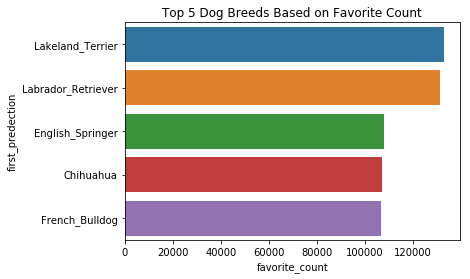

In [44]:
sns.barplot(top_5_fav.favorite_count, top_5_fav.first_predection, data= top_5_fav).set_title('Top 5 Dog Breeds Based on Favorite Count')

<br>**Top 5 Dog Breeds Based on Retweet Count**

In [45]:
top_5_ret = clean_df1.nlargest(5 ,'retweet_count')

Text(0.5,1,'Top 5 Dog Breeds Based on Retweet Count')

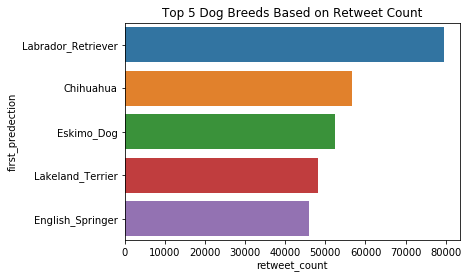

In [46]:
sns.barplot(top_5_ret.retweet_count, top_5_ret.first_predection, data= top_5_ret).set_title('Top 5 Dog Breeds Based on Retweet Count')

**Insight 1: So we have plotted the dog first_predicted breed against the likes and retweets counts and as we can see from the plots, the Labrador retriever, English Springer, Chihuahua, French Bulldog, Eskimo Dog and the Lakeland Terrior seems to be the top favorite dog breeds to people based on the favorite and retweet counts of the tweets.**

**Rating Denomenator of The Top 1000 Dogs With Highest Favorite Count**

In [47]:
clean_df1.nlargest(1000 ,'favorite_count').rating_numerator.value_counts()

12.00      326
13.00      258
11.00      195
10.00      117
14.00      38 
9.00       18 
8.00       11 
7.00       9  
5.00       6  
6.00       5  
1.00       3  
3.00       2  
2.00       2  
4.00       2  
165.00     1  
84.00      1  
9.75       1  
0.00       1  
420.00     1  
1776.00    1  
11.27      1  
Name: rating_numerator, dtype: int64

**Insight 2: we can see here from the table that the rating of 12 is the most popular rating given among the top 1000 favorite dogs, comes next the ratings of 13, 11 and 10. Any rating that is above 13 or below 8 doesn’t seem to be likely.**

**When Does the Account Tweet Most in a Day?**

Text(0,0.5,'Tweets Count')

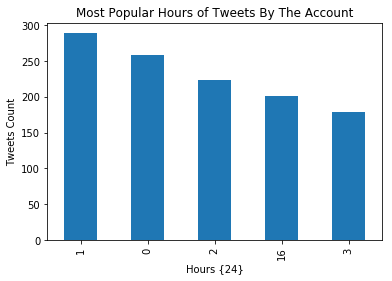

In [48]:
popular_tweet_time = clean_df1['timestamp'].apply(lambda x: x.hour).value_counts().head(5)
popular_tweet_time.plot('bar')
plt.title('Most Popular Hours of Tweets By The Account')
plt.xlabel('Hours {24}')
plt.ylabel('Tweets Count')

**Insight 3: The account seems to be mostly sending tweets in the middle of night, so we can see most of the tweets are sent on 1AM, 12 AM, 2AM, 4PM as an exception and 3AM. So it’s a night owl I guess.**